In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
sns.set()

# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/data/final_model_data.csv')
df['esrb_rating'].value_counts()

,count
esrb_rating,
E,19767
T,12823
E10+,6785
M,6489
AO,27


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit_transform(df['esrb_rating'])

array([1, 2, 1, ..., 4, 3, 1])

In [5]:
numeric = df.copy()
for i in numeric.columns:
  try:
    # print(numeric[i], numeric[i].dtype)
    if numeric[i].dtype == "object":
      # print("y", numeric[i].dtype)
      numeric = numeric.drop(columns=i)

  except Exception as e:
    # print(e)
    continue

fig = plt.figure(figsize=(100, 100))

sns.heatmap(numeric.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
fig.savefig("/content/drive/MyDrive/SQLproject/images/correlationHeatmap.png")

In [17]:
selected_features = [ 'release_year',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       'Mild Lyrics', 'Lyrics', 'Use of Drugs and Alcohol',
       'Animated Violence', 'Mild Sexual Themes', 'Sexual Content',
       'Drug and Alcohol Reference', 'Strong Lyrics', 'Mature Humor',
       'Edutainment', 'Gambling', 'Animated Blood and Gore', 'Informational',
       'Mature Sexual Themes', 'Mild Animated Violence', 'Gaming',
       'Realistic Violence', 'Realistic Blood', 'Suitable for Mature Users',
       'Gambling Themes', 'Realistic Blood and Gore', 'Sexual Violence',
       'Mild Realistic Violence', 'Suitable for All Users',
       'Mild Animated Blood']


In [18]:
dfs = df[selected_features].copy()
dfs = dfs.drop(columns=['na_sales','eu_sales','jp_sales','other_sales','global_sales'])

In [19]:
X = dfs

y = df["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
y.value_counts() ,y_train.value_counts(), y_test.value_counts()


(esrb_rating
 E       19767
 T       12823
 E10+     6785
 M        6489
 AO         27
 Name: count, dtype: int64,
 esrb_rating
 E       15840
 T       10240
 E10+     5421
 M        5190
 AO         21
 Name: count, dtype: int64,
 esrb_rating
 E       3927
 T       2583
 E10+    1364
 M       1299
 AO         6
 Name: count, dtype: int64)

Lets try with imputed dated

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

              precision    recall  f1-score   support

          AO       0.33      0.17      0.22         6
           E       0.92      0.93      0.93      3927
        E10+       0.77      0.78      0.77      1364
           M       0.93      0.91      0.92      1299
           T       0.84      0.83      0.83      2583

    accuracy                           0.88      9179
   macro avg       0.76      0.72      0.73      9179
weighted avg       0.88      0.88      0.88      9179

Accuracy Score: 0.876130


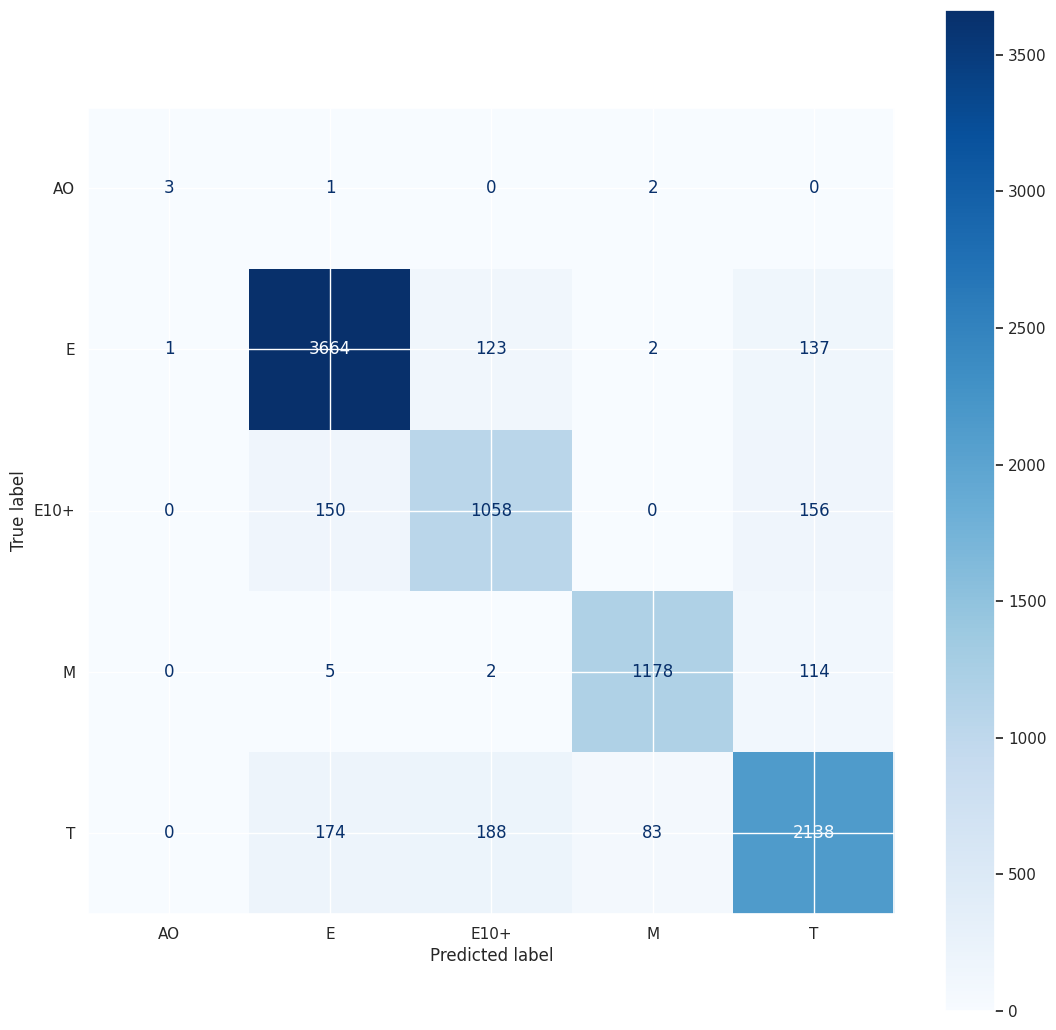

In [32]:
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y=y_test,
                              ax=ax,
                              cmap="Blues")

 precision    recall  f1-score   support

          AO       0.50      0.17      0.25         6
           E       0.92      0.93      0.93      3927
        E10+       0.78      0.78      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.85      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.80      0.73      0.74      9179
weighted avg       0.88      0.88      0.88      9179

In [17]:
y_test.unique()

array(['E', 'E10+', 'T', 'M', 'AO'], dtype=object)

In [21]:
fig.savefig("/content/drive/MyDrive/SQLproject/images/decision_tree.png")

In [13]:
# dot_data = tree.export_graphviz(model, out_file=None,
#                      feature_names=selected_features,
#                      class_names=["E", "ET", "M", "T"],
#                      filled=True, rounded=True,
#                      special_characters=True)
# graph = graphviz.Source(dot_data)

# graph
dot_data = tree.export_graphviz(model,
                     feature_names=dfs.columns,
                     class_names=['AO', 'E', 'E10+', 'M', 'T'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

fie_ext = 'svg'
temp_img = 'decisionTree'
graph.render(temp_img,format=fie_ext, view=False)

'decisionTree.svg'

In [21]:
len(y_train)

36712

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Strong Language is the first split

Could try tuning the parameters

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
31,0.157970,num_descriptors
29,0.151132,ReleaseDate
30,0.130425,strong_language
7,0.119362,fantasy_violence
2,0.077129,blood
3,0.061650,blood_and_gore
28,0.053224,violence
25,0.023561,suggestive_themes
18,0.022299,mild_violence
9,0.018195,language


In [20]:
model = RandomForestClassifier()

In [28]:
m = model.fit(X_train,y_train)

In [29]:
tree = m.tree_
tree.node_count

4665

In [14]:
y_pred = model.predict(X_test)


In [15]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.779497


In [11]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         6
           E       0.43      1.00      0.60      3927
        E10+       0.00      0.00      0.00      1364
           M       0.00      0.00      0.00      1299
           T       0.00      0.00      0.00      2583

    accuracy                           0.43      9179
   macro avg       0.09      0.20      0.12      9179
weighted avg       0.18      0.43      0.26      9179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[   1    0    0    4    1]
 [   1 3651  132    1  142]
 [   0  139 1069    0  156]
 [   0    4    1 1171  123]
 [   0  156  159   72 2196]]


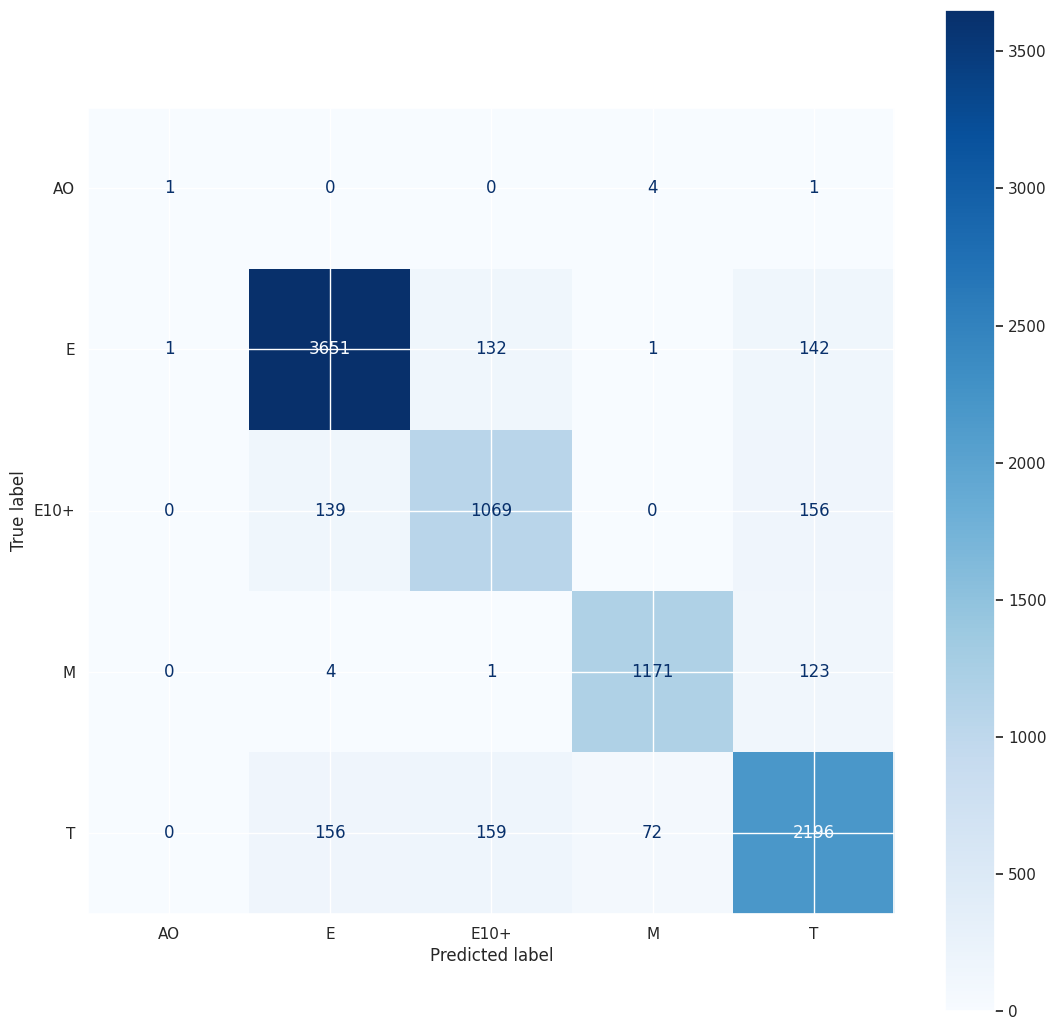

In [30]:
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y=y_test,
                              ax=ax,
                              cmap="Blues")

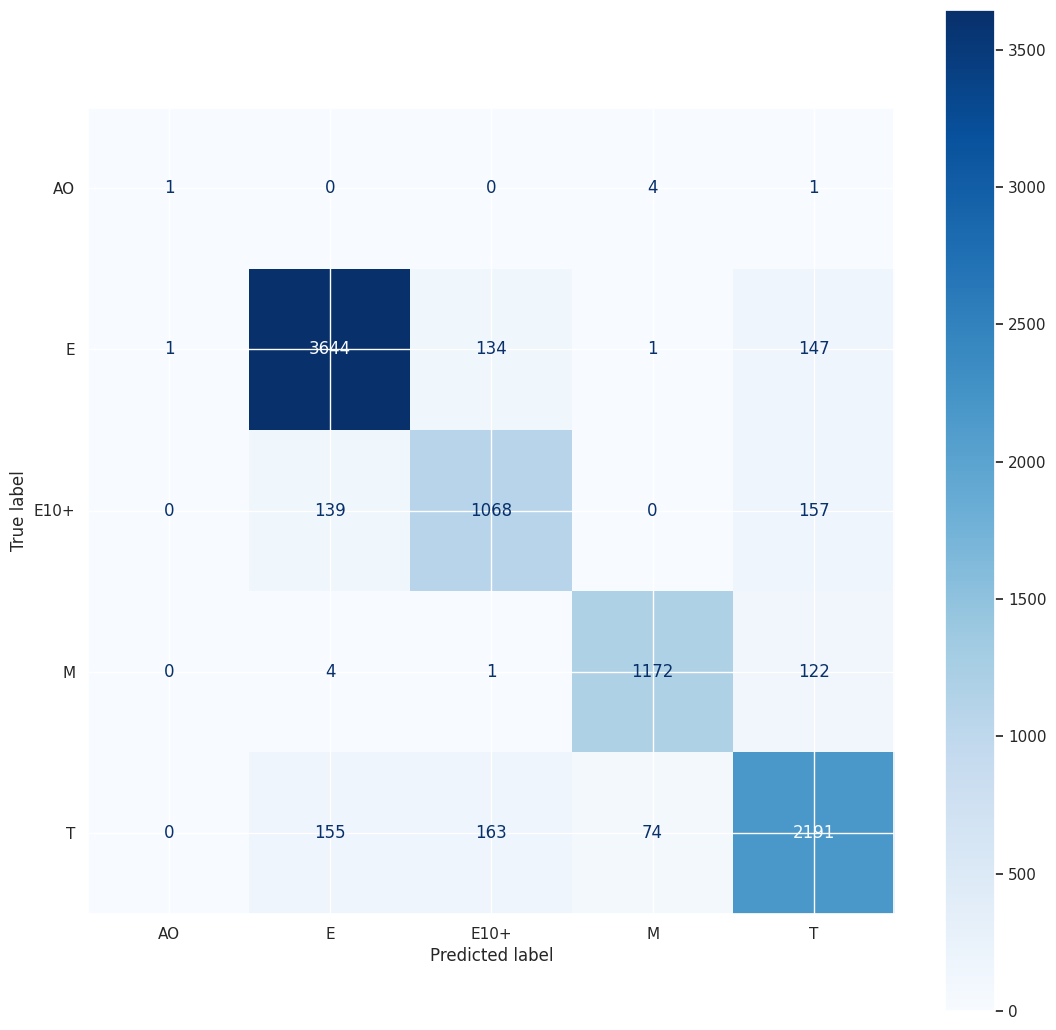

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y=y_test,
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features2 }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.194687,Number of Descriptors
7,0.109690,Violence
0,0.108010,release_year
21,0.082546,Strong Language
16,0.079122,Fantasy Violence
8,0.055139,Blood and Gore
23,0.050091,Blood
28,0.039349,Intense Violence
22,0.026163,Suggestive Themes
5,0.025012,Mild Language


Not much improvement from the regualr decision tree

Maybe would be better with tuning

In [ ]:
param_grid = {
    'n_estimators': [ 50, 100, 150, 300, 600],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 25, 35,45,55],
    'max_leaf_nodes': [3, 6, 9, 12],
}


In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=25, max_leaf_nodes=12, n_estimators=600)


In [ ]:
model_grid = RandomForestClassifier(max_depth=25,
                                    max_features=None,
                                    max_leaf_nodes=15,
                                    n_estimators=300)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred_grid))


              precision    recall  f1-score   support

          AO       0.33      0.50      0.40         2
           E       0.93      0.93      0.93      2918
        E10+       0.78      0.78      0.78      1041
           M       0.90      0.93      0.92       937
           T       0.85      0.83      0.84      1986

    accuracy                           0.88      6884
   macro avg       0.76      0.80      0.77      6884
weighted avg       0.88      0.88      0.88      6884

[[   1    0    0    2    0]
 [   1 2700   98    0  115]
 [   0  105  816    0  124]
 [   0    4    1  874   90]
 [   0  109  126   61 1657]]


In [ ]:
model_grid = RandomForestClassifier(max_depth=25,
                                    max_features=None,
                                    max_leaf_nodes=12,
                                    n_estimators=600)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred_grid))

              precision    recall  f1-score   support

          AO       0.33      0.50      0.40         2
           E       0.93      0.93      0.93      2918
        E10+       0.78      0.78      0.78      1041
           M       0.90      0.93      0.92       937
           T       0.85      0.83      0.84      1986

    accuracy                           0.88      6884
   macro avg       0.76      0.80      0.77      6884
weighted avg       0.88      0.88      0.88      6884

[[   1    0    0    2    0]
 [   1 2700   98    0  115]
 [   0  105  816    0  124]
 [   0    4    1  874   90]
 [   0  109  126   61 1657]]


In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features2 }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.194687,Number of Descriptors
7,0.109690,Violence
0,0.108010,release_year
21,0.082546,Strong Language
16,0.079122,Fantasy Violence
8,0.055139,Blood and Gore
23,0.050091,Blood
28,0.039349,Intense Violence
22,0.026163,Suggestive Themes
5,0.025012,Mild Language


In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=12,
                       n_estimators=50)


              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         1
           E       0.93      0.90      0.92      4034
        E10+       0.68      0.74      0.71      1253
           M       0.87      0.91      0.89      1237
           T       0.81      0.79      0.80      2654

    accuracy                           0.85      9179
   macro avg       0.66      0.67      0.66      9179
weighted avg       0.85      0.85      0.85      9179



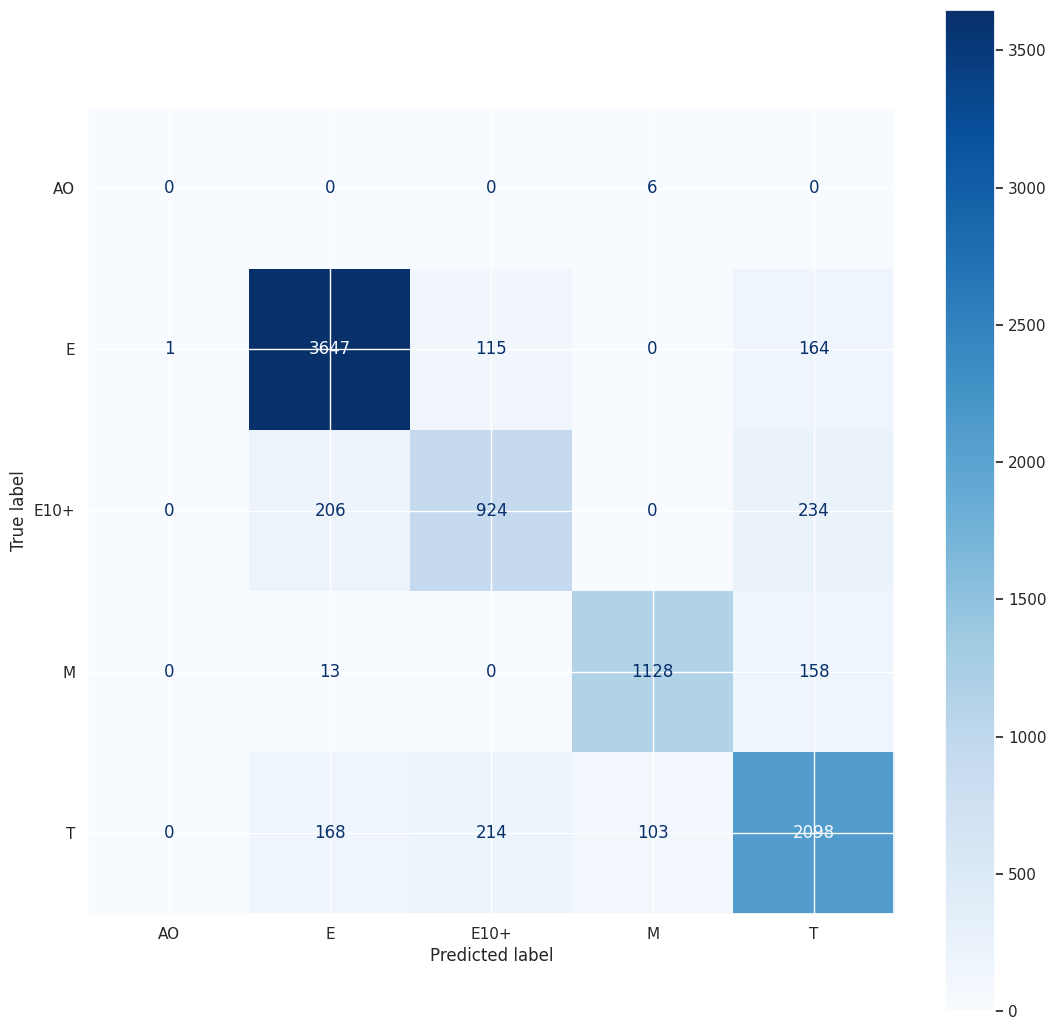

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X_train, y_train)


y_pred = clf.predict(X = X_test)
print(classification_report(y_pred, y_test))
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=clf,
                              X=X_test,
                              y=y_test,
                              ax=ax,
                              cmap="Blues")

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

          AO       0.67      0.33      0.44         6
           E       0.92      0.93      0.93      3927
        E10+       0.77      0.79      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.84      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.83      0.76      0.78      9179
weighted avg       0.88      0.88      0.88      9179



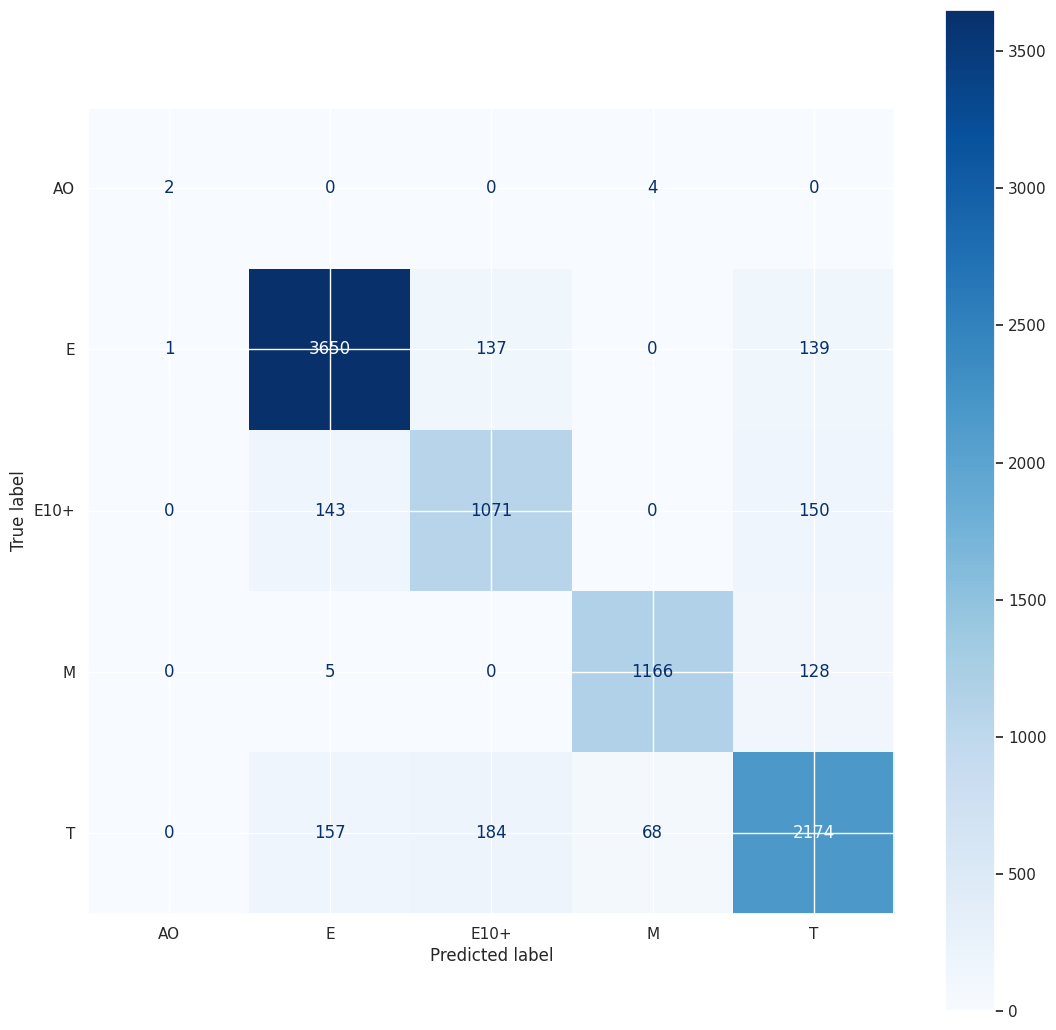

In [37]:
import xgboost as xgb

ye_train = le.fit_transform(y_train)
ye_test = le.fit_transform(y_test)
#Creating an XGBoost classifier
model = xgb.XGBClassifier(learning_rate=1)
#Training the model on the training data
model.fit(X_train,ye_train)
#Making predictions on the test set
predictions = model.predict(X_test)
#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(ye_test, predictions, target_names=['AO', 'E', 'E10+', 'M', 'T']))
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y=ye_test,
                              display_labels=['AO', 'E', 'E10+', 'M', 'T'],
                              ax=ax,
                              cmap="Blues")
#Expected: [0 1 2 3 4], got ['AO' 'E' 'E10+' 'M' 'T']

In [71]:
import xgboost as xgb

learning_rate = [0.2, 0.3, 0.5, 0.8, 1.0]
#Creating an XGBoost classifier
for i in learning_rate:
  model = xgb.XGBClassifier(learning_rate=i)
  #Training the model on the training data
  model.fit(X_train,ye_train)
  #Making predictions on the test set
  predictions = model.predict(X_test)
  #Calculating accuracy
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy:", accuracy)
  print("\nClassification Report:")
  print(classification_report(ye_test, predictions, target_names=['AO', 'E', 'E10+', 'M', 'T']))
  #Expected: [0 1 2 3 4], got ['AO' 'E' 'E10+' 'M' 'T']

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

          AO       1.00      0.33      0.50         6
           E       0.92      0.93      0.92      3927
        E10+       0.74      0.75      0.75      1364
           M       0.93      0.89      0.91      1299
           T       0.82      0.82      0.82      2583

    accuracy                           0.86      9179
   macro avg       0.88      0.74      0.78      9179
weighted avg       0.87      0.86      0.86      9179

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

          AO       0.67      0.33      0.44         6
           E       0.92      0.93      0.92      3927
        E10+       0.75      0.75      0.75      1364
           M       0.93      0.89      0.91      1299
           T       0.83      0.82      0.83      2583

    accuracy                           0.87      9179
   macro avg       0.82      0.75      0.77      9179
w

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train, ye_train)
y_pred = clf.predict(X = X_test)
#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("\nClassification Report:")
print(classification_report(ye_test, y_pred, target_names=['AO', 'E', 'E10+', 'M', 'T']))



Classification Report:
              precision    recall  f1-score   support

          AO       0.25      0.17      0.20         6
           E       0.92      0.92      0.92      3927
        E10+       0.72      0.71      0.72      1364
           M       0.91      0.87      0.89      1299
           T       0.79      0.80      0.80      2583

    accuracy                           0.85      9179
   macro avg       0.72      0.70      0.70      9179
weighted avg       0.85      0.85      0.85      9179



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [0.001, 0.01, 0.1, 0.5]
for i in learning_rate:
  clf = GradientBoostingClassifier(max_depth=25,
                                      max_features=None,
                                      max_leaf_nodes=12,
                                      n_estimators=600,
                                  learning_rate=i)

  clf.fit(X_train, ye_train)
  y_pred = clf.predict(X = X_test)
  #Calculating accuracy
  accuracy = accuracy_score(y_test, predictions)
  print("learning rate",i, ", Accuracy:", accuracy)
  print("\nClassification Report:")
  print(classification_report(ye_test, y_pred, target_names=['AO', 'E', 'E10+', 'M', 'T']))


learning rate 0.001 , Accuracy: 0.8688310273450267

Classification Report:
              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         6
           E       0.88      0.93      0.91      3927
        E10+       0.73      0.55      0.63      1364
           M       0.91      0.84      0.87      1299
           T       0.73      0.80      0.76      2583

    accuracy                           0.82      9179
   macro avg       0.65      0.62      0.63      9179
weighted avg       0.82      0.82      0.82      9179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


learning rate 0.01 , Accuracy: 0.8688310273450267

Classification Report:
              precision    recall  f1-score   support

          AO       0.67      0.33      0.44         6
           E       0.92      0.92      0.92      3927
        E10+       0.73      0.73      0.73      1364
           M       0.92      0.88      0.90      1299
           T       0.80      0.82      0.81      2583

    accuracy                           0.86      9179
   macro avg       0.81      0.74      0.76      9179
weighted avg       0.86      0.86      0.86      9179

learning rate 0.1 , Accuracy: 0.8688310273450267

Classification Report:
              precision    recall  f1-score   support

          AO       1.00      0.17      0.29         6
           E       0.93      0.93      0.93      3927
        E10+       0.75      0.79      0.77      1364
           M       0.94      0.89      0.91      1299
           T       0.83      0.84      0.84      2583

    accuracy                          


Classification Report:
              precision    recall  f1-score   support

          AO       0.20      0.50      0.29         6
           E       0.93      0.93      0.93      3927
        E10+       0.78      0.79      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.85      0.85      2583

    accuracy                           0.88      9179
   macro avg       0.74      0.79      0.75      9179
weighted avg       0.88      0.88      0.88      9179



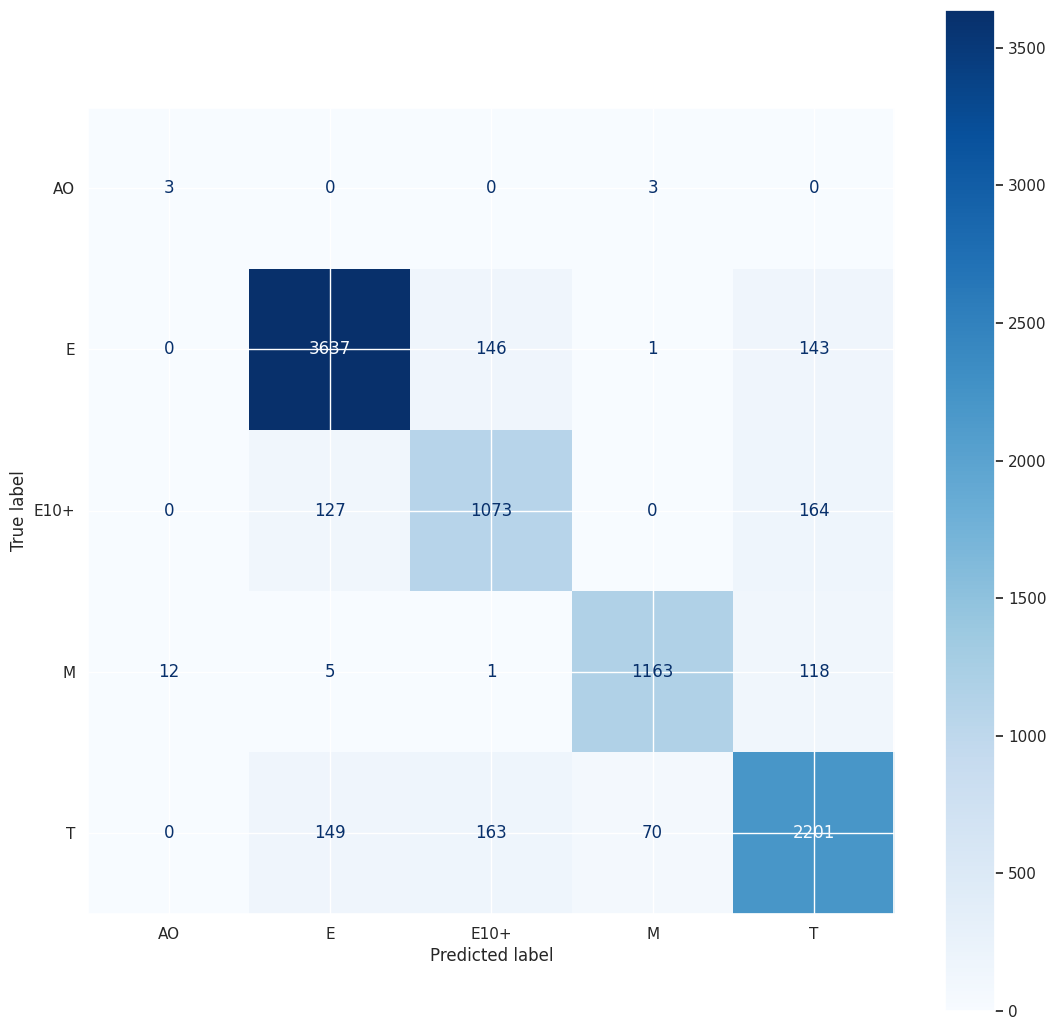

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=25,
                                    max_features=None,
                                    max_leaf_nodes=12,
                                    n_estimators=600,
                                learning_rate=0.5)

clf.fit(X_train, ye_train)
y_pred = clf.predict(X = X_test)
#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("\nClassification Report:")
print(classification_report(ye_test, y_pred, target_names=['AO', 'E', 'E10+', 'M', 'T']))
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=clf,
                              X=X_test,
                              y=ye_test,
                              display_labels=['AO', 'E', 'E10+', 'M', 'T'],
                              ax=ax,
                              cmap="Blues")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         0
           E       0.92      0.89      0.90      4036
        E10+       0.70      0.66      0.68      1452
           M       0.80      0.90      0.85      1150
           T       0.75      0.77      0.76      2541

    accuracy                           0.82      9179
   macro avg       0.63      0.64      0.64      9179
weighted avg       0.82      0.82      0.82      9179



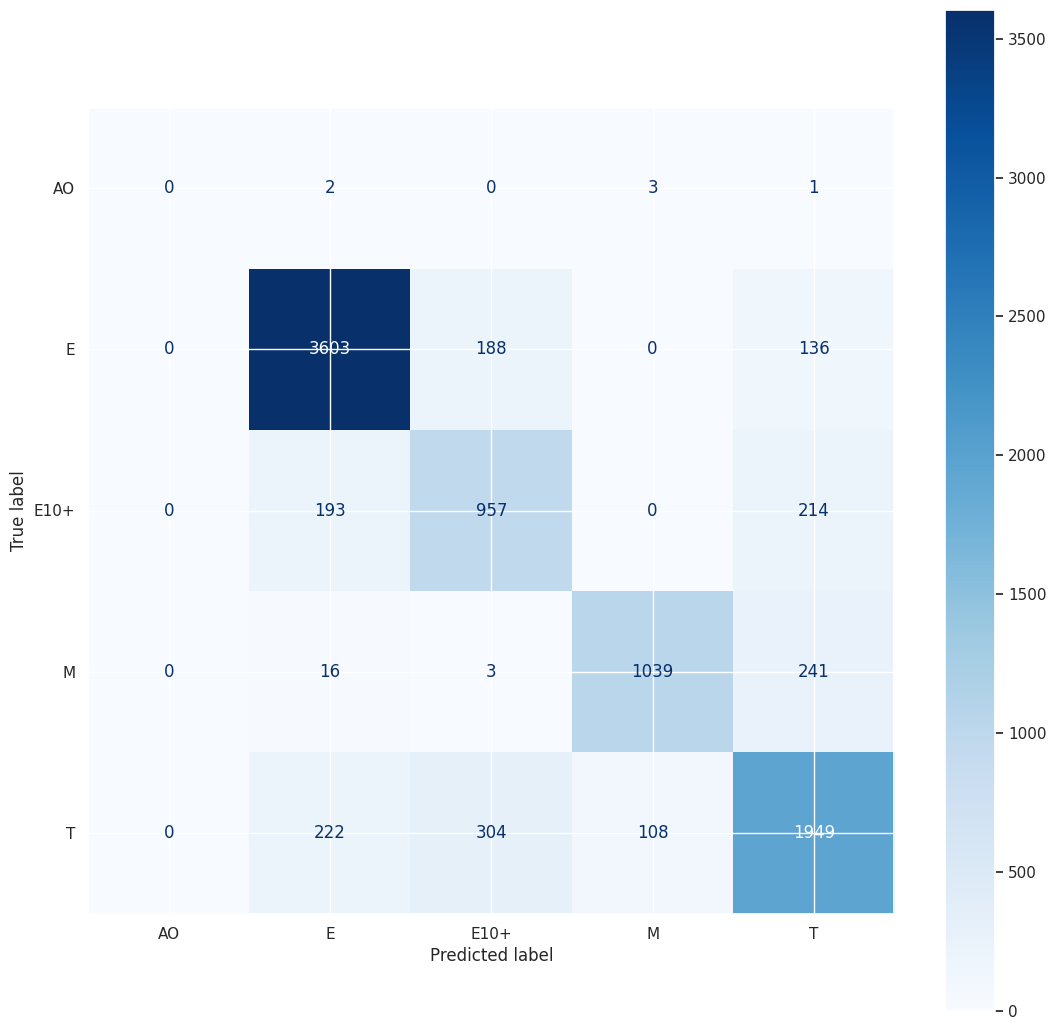

In [49]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=600)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(classification_report(y_pred, y_test))
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=reg,
                              X=X_test,
                              y=y_test,
                              display_labels=['AO', 'E', 'E10+', 'M', 'T'],
                              ax=ax,
                              cmap="Blues")

              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         2
           E       0.90      0.92      0.90      3841
        E10+       0.80      0.62      0.70      1756
           M       0.81      0.92      0.86      1146
           T       0.73      0.78      0.76      2434

    accuracy                           0.82      9179
   macro avg       0.65      0.65      0.64      9179
weighted avg       0.82      0.82      0.82      9179



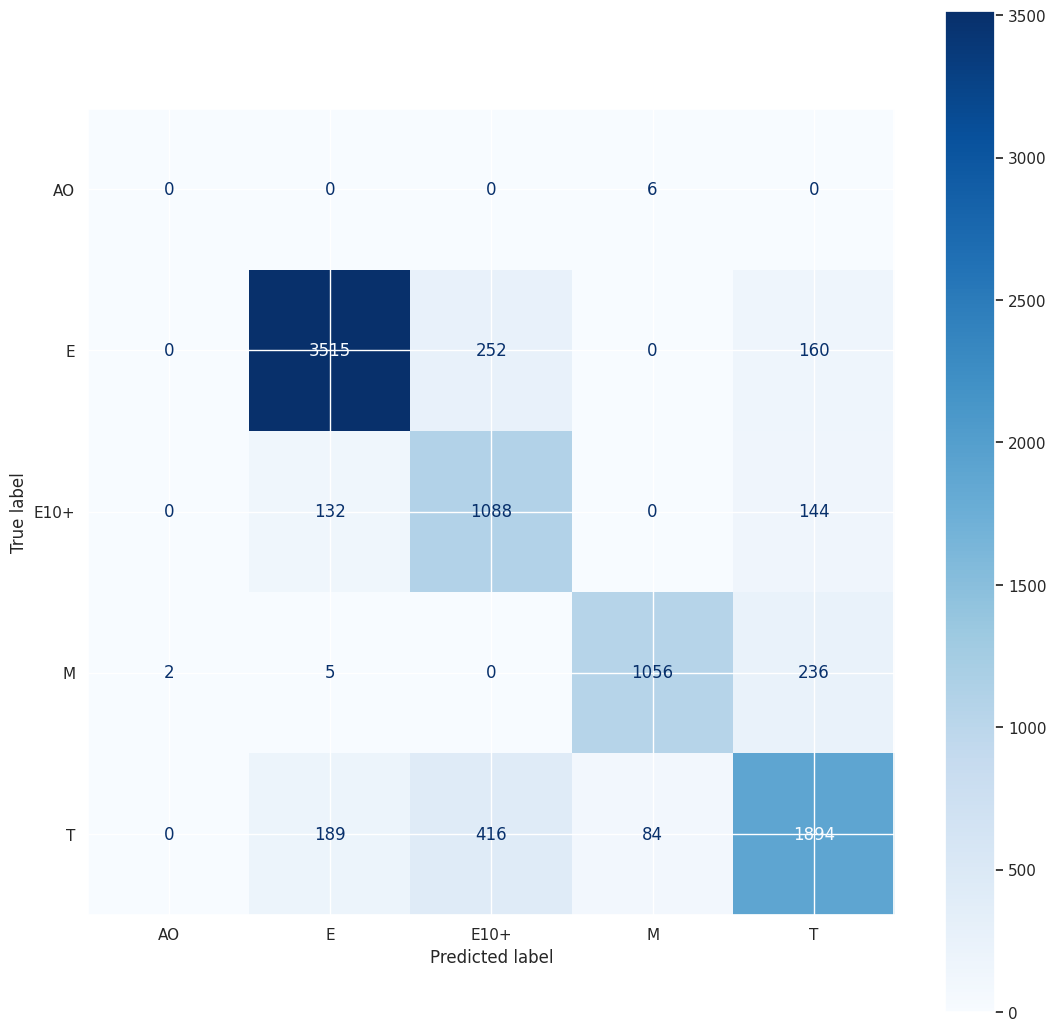

In [48]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

y_pred = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_pred, y_test))
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=clf,
                              X=X_test,
                              y=y_test,
                              display_labels=['AO', 'E', 'E10+', 'M', 'T'],
                              ax=ax,
                              cmap="Blues")

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

          AO       1.00      0.00      0.00      2534
           E       0.06      0.68      0.11       244
        E10+       0.97      0.36      0.52      2821
           M       0.60      0.73      0.66       792
           T       0.24      0.96      0.39       493

    accuracy                           0.32      6884
   macro avg       0.57      0.55      0.33      6884
weighted avg       0.85      0.32      0.32      6884



In [21]:
dtc = DecisionTreeClassifier()
y_pred = dtc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          AO       0.67      0.50      0.57         4
           E       0.93      0.92      0.92      2955
        E10+       0.77      0.78      0.77      1032
           M       0.91      0.93      0.92       947
           T       0.83      0.83      0.83      1946

    accuracy                           0.87      6884
   macro avg       0.82      0.79      0.80      6884
weighted avg       0.88      0.87      0.87      6884



In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
rfc.get_params()

              precision    recall  f1-score   support

          AO       0.17      0.50      0.25         2
           E       0.93      0.92      0.93      3940
        E10+       0.79      0.78      0.79      1377
           M       0.90      0.94      0.92      1256
           T       0.85      0.84      0.84      2604

    accuracy                           0.88      9179
   macro avg       0.73      0.80      0.74      9179
weighted avg       0.88      0.88      0.88      9179

[[   1    0    0    4    1]
 [   1 3643  135    1  147]
 [   0  137 1076    0  151]
 [   0    6    1 1175  117]
 [   0  154  165   76 2188]]


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/CombinedESRBdata.csv')

In [ ]:
encode = {'E' : 0,
          'E10+': 1,
          'T' : 2,
          'M' : 3,
          'AO':4}
df["esrb_encoded"] = df["esrb_rating"].map(encode)

In [ ]:
selected_features = [ 'release_year',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       'Mild Lyrics', 'Lyrics', 'Use of Drugs and Alcohol',
       'Animated Violence', 'Mild Sexual Themes', 'Sexual Content',
       'Drug and Alcohol Reference', 'Strong Lyrics', 'Mature Humor',
       'Edutainment', 'Gambling', 'Animated Blood and Gore', 'Informational',
       'Mature Sexual Themes', 'Mild Animated Violence', 'Gaming',
       'Realistic Violence', 'Realistic Blood', 'Suitable for Mature Users',
       'Gambling Themes', 'Realistic Blood and Gore', 'Sexual Violence',
       'Mild Realistic Violence', 'Suitable for All Users',
       'Mild Animated Blood']

dfs = df[selected_features].copy()
dfs = dfs.drop(columns=['na_sales','eu_sales','jp_sales','other_sales','global_sales'])

In [ ]:
df = df.fillna(0)
X = df[selected_features]

y = df["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)


In [65]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          AO       0.17      0.50      0.25         2
           E       0.93      0.92      0.93      3946
        E10+       0.79      0.78      0.79      1372
           M       0.90      0.94      0.92      1246
           T       0.85      0.84      0.84      2613

    accuracy                           0.88      9179
   macro avg       0.73      0.80      0.74      9179
weighted avg       0.88      0.88      0.88      9179

[[   1    0    0    4    1]
 [   1 3649  136    1  140]
 [   0  135 1075    0  154]
 [   0    4    1 1168  126]
 [   0  158  160   73 2192]]


Classification Report:
              precision    recall  f1-score   support

          AO       0.67      0.33      0.44         6
           E       0.92      0.93      0.93      3927
        E10+       0.77      0.77      0.77      1364
           M       0.94      0.89      0.92      1299
           T       0.83      0.84      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.83      0.75      0.78      9179
weighted avg       0.88      0.88      0.88      9179

Classification Report:
              precision    recall  f1-score   support

          AO       1.00      0.33      0.50         6
           E       0.92      0.93      0.93      3927
        E10+       0.78      0.79      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.84      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.90      0.76      0.79      9179
weighted avg       0.88      0.88      0.88      9179

In [ ]:
X = dfs

y = df["esrb_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [ ]:
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': np.random.randint(100, 800, 10),
               'max_features': ['sqrt'],
               'max_depth': np.random.randint(20, 30, 5),
               'max_leaf_nodes': np.random.randint(28, 50, 10),
               'bootstrap': bootstrap}
for i in random_grid:
  print(i, random_grid[i])

n_estimators [107 766 381 101 600 516 609 198 363 731]
max_features ['sqrt']
max_depth [21 28 24 26 28]
max_leaf_nodes [44 43 46 41 47 39 38 28 32 36]
bootstrap [True, False]


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

NameError: name 'random_grid' is not defined

In [ ]:
# rf_random.best_params_
scores = pd.DataFrame(rf_random.cv_results_).sort_values(by=['rank_test_score'])
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaf_nodes,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
30,16.533961,0.239659,2.088104,0.353934,609,47,sqrt,26,True,"{'n_estimators': 609, 'max_leaf_nodes': 47, 'm...",0.835349,0.840974,0.839667,0.838663,0.002404,1
46,20.117060,0.460127,1.916141,0.514791,600,46,sqrt,28,False,"{'n_estimators': 600, 'max_leaf_nodes': 46, 'm...",0.834450,0.841710,0.839258,0.838473,0.003015,2
85,13.355520,0.499337,1.059650,0.061410,363,47,sqrt,21,False,"{'n_estimators': 363, 'max_leaf_nodes': 47, 'm...",0.834123,0.842445,0.838604,0.838391,0.003401,3
0,28.032463,1.725078,2.719433,0.873694,766,46,sqrt,21,False,"{'n_estimators': 766, 'max_leaf_nodes': 46, 'm...",0.834532,0.840320,0.840320,0.838391,0.002729,4
23,6.224933,1.528201,0.508840,0.018022,198,46,sqrt,21,False,"{'n_estimators': 198, 'max_leaf_nodes': 46, 'm...",0.834777,0.840974,0.839421,0.838391,0.002633,5


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter( x=scores["split0_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split0',
                    )
)
fig.add_trace(go.Scatter( x=scores["split1_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split1',
                    )
)
fig.add_trace(go.Scatter( x=scores["split2_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split2',
                    )
)
fig.update_layout(legend = dict(bordercolor='rgb(100,9,100)',
                                title='max_depth',
                                borderwidth=2,
                                itemclick= 'toggleothers',
                                x=0.91,
                                y=1))

fig.show()
# ["split0_test_score","split1_test_score","split2_test_score"]
# param_max_leaf_nodes

In [ ]:
scores['n_estimators'] = np.random.randint(100, 800, scores.shape[0])
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_leaf_nodes,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,n_estimators
11,11.072568,0.723101,0.995558,0.246146,400,8,30,sqrt,24,False,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824563,0.829942,0.834355,0.829620,0.004004,1,555
4,9.497247,1.185812,0.963085,0.183679,400,10,30,sqrt,26,True,"{'n_estimators': 400, 'min_samples_split': 10,...",0.825625,0.830677,0.832230,0.829511,0.002820,2,612
2,10.888280,1.156044,0.840077,0.028704,400,12,30,sqrt,24,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.824073,0.827409,0.830187,0.827223,0.002500,3,419
1,48.328120,1.285588,1.669163,0.082616,500,8,30,None,24,True,"{'n_estimators': 500, 'min_samples_split': 8, ...",0.825135,0.827654,0.828634,0.827141,0.001474,4,625
8,40.202245,0.758875,1.048490,0.297771,400,8,30,None,26,True,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824726,0.827245,0.828634,0.826869,0.001618,5,192
17,47.362561,1.783576,1.430657,0.300438,500,10,30,None,26,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.825870,0.827899,0.826837,0.826869,0.000829,6,237
9,39.986748,2.463376,0.931089,0.228402,400,8,30,None,24,True,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824399,0.828144,0.826837,0.826460,0.001552,7,214
14,8.856835,1.325484,0.918686,0.141471,400,12,20,sqrt,25,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.816555,0.822342,0.824630,0.821176,0.003398,8,757
12,52.797225,0.825035,1.028037,0.317294,400,12,30,None,24,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.819660,0.822751,0.819645,0.820685,0.001460,9,420
0,73.586349,4.255674,1.723075,0.085541,500,10,30,None,25,False,"{'n_estimators': 500, 'min_samples_split': 10,...",0.819660,0.822751,0.819645,0.820685,0.001460,9,187


In [ ]:
import plotly.express as px
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:
  fig = px.scatter(scores, x=i, y='mean_fit_time', symbol='param_max_leaf_nodes',
              color='param_max_depth',
              # size = 'param_n_estimators'
                   )
  fig.show()

In [ ]:
rf_random.best_params_

{'n_estimators': 609,
 'max_leaf_nodes': 47,
 'max_features': 'sqrt',
 'max_depth': 26,
 'bootstrap': True}

In [ ]:
# Create the parameter grid based on the results of random search

param_grid = {'bootstrap': [True],
 'ccp_alpha': [0,0.1],
 'class_weight': [None],
 'criterion': ['gini'],
 'max_depth': [None],
 'max_features': ['sqrt'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0,0.1],
 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
 'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
 'min_weight_fraction_leaf': [0,0.1],
 'n_estimators': np.random.randint(50, 100, 10),
 'n_jobs': [None],
 'oob_score': [False],
 'random_state': [None],
 'warm_start': [False]}

 # Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, verbose= 3)

In [ ]:
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=7, min_weight_fraction_leaf=0.1, n_estimators=59, n_jobs=None, oob_score=False, random_state=None, warm_start=False;, score=0.431 total time=   0.4s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=7, min_weight_fraction_leaf=0.1, n_estimators=59, n_jobs=None, oob_score=False, random_state=None, warm_start=False;, score=0.431 total time=   0.5s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_spl

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2400 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0, 0.1],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0, 0.1],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0, 0.1],
                         'n_estimators': array([83, 65, 95, 59, 77, 67, 79, 89, 51, 73]),
                         'n_jobs': [None], 'oob_score': [False],
                         'random_state': [None], 'warm_start': [False]},
             verbose=3)

In [ ]:
# rf_random.best_params_
scores = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])
scores.to_csv('/content/drive/MyDrive/SQLproject/GridScores.csv', index=False)
scores

In [ ]:
scores.iloc[1]

,40
mean_fit_time,2.938585
std_fit_time,1.122992
mean_score_time,0.374676
std_score_time,0.017033
param_bootstrap,True
param_ccp_alpha,0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,sqrt


In [42]:
scores = pd.read_csv('/content/drive/MyDrive/SQLproject/data/GridScores.csv')
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,...,param_oob_score,param_random_state,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.805523,0.107618,0.275335,0.003045,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868116,0.875215,0.873090,0.872140,0.002975,1
1,2.938585,1.122992,0.374676,0.017033,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867789,0.875133,0.873417,0.872113,0.003137,2
2,2.633250,0.511035,0.511534,0.081988,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875133,0.872926,0.872113,0.002857,3
3,1.383433,0.001768,0.230261,0.000797,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875868,0.872027,0.872058,0.003098,4
4,2.254096,0.080590,0.375973,0.001769,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867380,0.875787,0.872763,0.871977,0.003477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.009100,0.001207,0.000000,0.000000,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",NaN,NaN,NaN,NaN,NaN,7201
7996,0.011243,0.001494,0.000000,0.000000,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",NaN,NaN,NaN,NaN,NaN,7201
7997,0.007602,0.000041,0.000000,0.000000,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",NaN,NaN,NaN,NaN,NaN,7201
7998,0.007699,0.000137,0.000000,0.000000,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",NaN,NaN,NaN,NaN,NaN,7201


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/CombinedESRBdata.csv')
df.iloc[0:10]

In [44]:
scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_ccp_alpha', 'param_class_weight',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_max_leaf_nodes', 'param_max_samples',
       'param_min_impurity_decrease', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_min_weight_fraction_leaf',
       'param_n_estimators', 'param_n_jobs', 'param_oob_score',
       'param_random_state', 'param_warm_start', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
import plotly.express as px
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:
  fig = px.scatter(scores, x=i, y='param_min_weight_fraction_leaf',
              #      symbol='param_min_samples_leaf',
              # color='param_n_estimators ',
              # size = 'param_min_samples_split','
                   )
  #bad param_min_impurity_decrease
  # good param_min_weight_fraction_leaf

  fig.show()

In [46]:
import plotly.express as px
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ['param_bootstrap', 'param_ccp_alpha', 'param_class_weight',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_max_leaf_nodes', 'param_max_samples',
       'param_min_impurity_decrease', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_min_weight_fraction_leaf',
       'param_n_estimators', 'param_n_jobs', 'param_oob_score',
       'param_random_state', 'param_warm_start', 'params']:
  fig = px.scatter(scores, x=["split0_test_score","split1_test_score","split2_test_score"], y=i
              #      symbol='param_min_samples_leaf',
              # color='param_n_estimators ',
              # size = 'param_min_samples_split','
                    )
  #bad param_min_impurity_decrease
  # good param_min_weight_fraction_leaf
  fig.update_layout(
      xaxis_title="Accuracy"
  )

  fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.graph_objects as go
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:


    fig = go.Scatter(
            x=scores[i],
            y=scores['param_min_weight_fraction_leaf'],
            mode='markers',
            marker=go.Marker(size==,
                              sizemode='area',
                              sizeref=juv_pop.max()/600,
                              opacity=0.4,
                              color='blue')
                   )

  fig.show()

In [ ]:
clfs = []
ccp_alphas = np.linspace(0, 0.05, 100)
for ccp_alpha in ccp_alphas:
    clf = RandomForestClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


KeyboardInterrupt: 

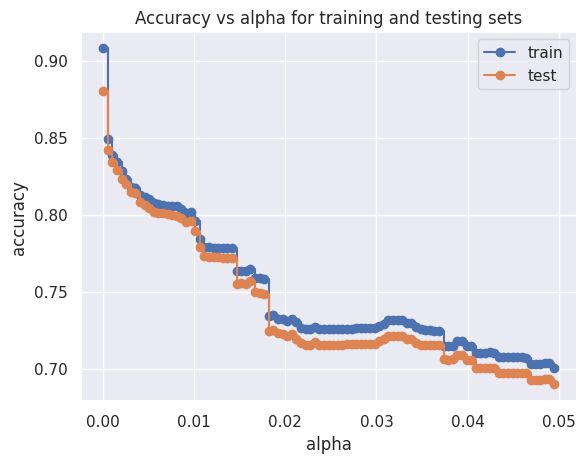

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# node_counts = [clf.tree_.node_count for clf in clfs]
# depth = [clf.tree_.max_depth for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clfs = []
min_weight_fraction_leafs = np.linspace(0, 0.05, 100)
for mwfl in min_weight_fraction_leafs:
    clf = RandomForestClassifier(random_state=0,min_weight_fraction_leaf=mwfl )
    clf.fit(X_train, y_train)
    clfs.append(clf)

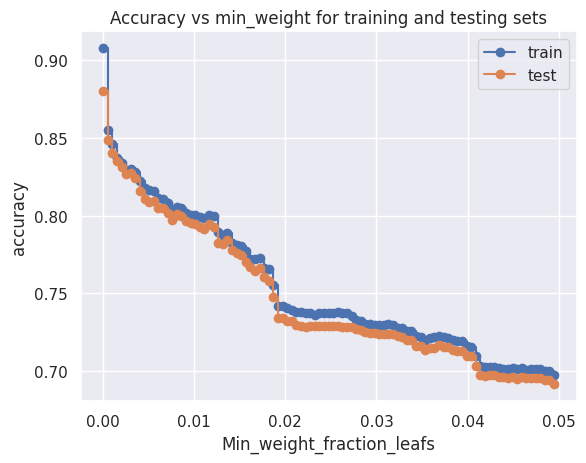

In [ ]:
# clfs = clfs[:-1]
# min_weight_fraction_leafs = min_weight_fraction_leafs[:-1]

# # node_counts = [clf.tree_.node_count for clf in clfs]
# # depth = [clf.tree_.max_depth for clf in clfs]
# train_scores = [clf.score(X_train, y_train) for clf in clfs]
# test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Min_weight_fraction_leafs")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs min_weight for training and testing sets")
ax.plot(min_weight_fraction_leafs, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(min_weight_fraction_leafs, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clfs = []
truth = [0, 1]
for b in truth:
    clf = RandomForestClassifier(random_state=0,bootstrap=b )
    clf.fit(X_train, y_train)
    clfs.append(clf)

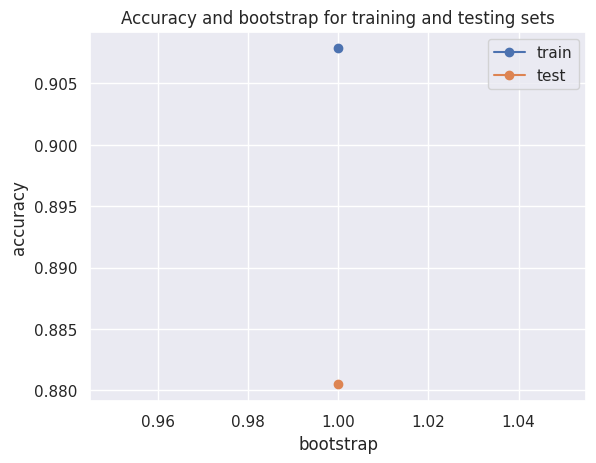

In [29]:
clfs = clfs[:-1]
truth = truth[:-1]

# # node_counts = [clf.tree_.node_count for clf in clfs]
# depth = [clf.tree_.max_depth for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("bootstrap")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy and bootstrap for training and testing sets")
ax.plot(truth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(truth, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
clf = RandomForestClassifier(random_state=0,bootstrap=True )
clf.fit(X_train, y_train)
y_pred = clf.predict(X = X_test)
#Calculating accuracy
accuracy = accuracy_score(y_test, y_pred=y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")

Accuracy: 0.8804880705959255

Classification Report:
